# Project 2: Sequence Conservation of Essential and Non-essential Proteins and Choosing a Model Organism for Kinetochore Studies

*Vivian Cai, BIMM143, Spring 2021*

<div class="alert alert-block alert-info">
    <b>Research Question:</b> Given that most kinetochore and centromere related studies utilizes model organisms, how similar is the amino acid sequences of human inner kinetochore protein CENP-C and the histone 3-like nucleosome protein CENP-A to their homologs in yeast (S. cerevisiae), rat (R. norvegicus), chicken (G. gallus), monkey (M. mulatta) and Chinese hamster (C. griseus)?
    </div>

# Introduction and Background

The kinetochore, one of the cell's largest protein complexes, is resposible for connecting the spindle microtubule to chromosomal centromere. This allows for the faithful separation of sister cromatids during mitosis and that of the homologous chromosomes during mieosis in eukaryotes. (Cheeseman, 2014)
<br><br>
Protein complexes of the kinetochore has the ability to recognize CENP-A/Cse4 nucleosomes, around which wraps the centromeric DNA.(Cheeseman, 2014) Despite the importance for such specificity of the kinetochore, much of this process is unknown. At the core of the kinetochore rests the constitutive centromere‐associated network(CCAN) or the ctf19 complex (as in budding yeast). The structure of CCAN has been explored by cryo-EM and was shown to has essential interactions with the CENP-A nucleosome as well as the centromeric DNA. (Hinshaw & Harrison, 2019) 
<br><br> 
Moreover, the CENP-C ortholog in yeast, Mif2, within the CCAN complex was found to have CENP-A/Cse4-dependent interaction with the centromere region. (Xiao et al., 2017) Therefore, it is clear that both CENP-A and CENP-C plays and important role in the kinetochore-centromere recognition pathway, and the presented study is interested in the amino acid sequence conservation of these two proteins from yeast to human.
<br><br>
To achieve said objective, the presented study will look at the protein sequences of CENP-A and CENP-C in human and 5 commonly used model organisms including budding yeast, rat, chicken, monkey, and Chinese hamster. These species are chosen because they are widely used in the studies of cellular and molecular mechanisms and has the amino acid sequences available for orthologs of both CENP-A and CENP-C. 
<br><br>
Said protein sequences are publicly available on <a href="https://www.uniprot.org/">uniprot.org</a> and could be easily retrieved in python using the ExPASy server as mediated by the Biopython package.

<div class="alert alert-block alert-success">
<b>Scientific Hypothesis:</b> If CENP-A but not CENP-C is essential for human cell viability, then the protein sequences of CENP-A might be more conserved among all species.
</div>

It has been found that the evolution of CCAN is incredibly flexible. In fact, most subunits of CCAN are absent in many eukaryotic lineages. (Hooff et al., 2017) Furthermore, it is known that CENP-A is essential for human cell viability, while CENP-C, dispite being essential in budding yeast, is dispensable in human cells. (Hinshaw & Harrison, 2019) These observations has led to the hypothesis that the protein sequences of CENP-A might be more conserved than CENP-C.
<br><br>
To explore the scientific hypothesis, the presented study conducted pairwise and multiple sequence alignements (MSA) of the protein seqeunces retrieved. First, the orthologs of both CENP-A and CENP-C from each of the chosen model organisms are aligned with the human CENP-A and CENP-C. A score for the pairwise alignment was calculated for later analysis using heat maps. Then, all the CENP-A and CENP-C sequences are aligned by the MUSCLE MSA aligorithm, and the algined .fasta files are later analysed through a MSA viewer and a phylogenetic tree.
<br><br>
To obtain the protein sequence data, I retrieved sequence information using protein IDs found on UniProt and combined the sequence objects into one .fasta file using the code presented in part 2 (as shown below), the retrieval of the sequences are explained in detail in part 2 as well.

# Bioinformatics Analysis and Data Visualization

## *1. Import the Packages*

Some of the packages requires installation before we can import it into Jupyter Notebook. Here are the command you will need to install them: (A detailed definition of what each package does is annoted in the next cell right below each import command.) (Notice that you can use pip or conda for most of the packages, but some of them requires pip.)

- numpy:
    * conda install numpy
    * pip install numpy
    <br><br>
- matplotlib:
    * conda install matplotlib
    * pip install -U matplotlib
    <br><br>
- Biopython: 
    * pip install biopython
    <br><br>
- seaborn:
    * conda install seaborn
    * pip install seaborn
    <br><br>
- panel:
    * conda install -c pyviz panel
    * pip install panel
    <br><br>
- bokeh:
    * conda install bokeh
    * pip install bokeh
    <br><br>
- MUSCLE:
    * conda install -c bioconda muscle

In [1]:
# import all the packages needed. 
# Each package/module is defined by the comments below the import code.

import numpy as np
# numpy: a library for programming in Python, contains functions that allows us to work with high dimentional arrays.
# It is the fundamental package that allows us to do high-level mathmatical operations on matrices.

import os, io
# The os module in Python provides a way of using operating system dependent functionality. 
# The functions that the OS module provides allow you to interface with the operating system (Windows, Mac or Linux).
# The io module provides Python’s main facilities for dealing with various types of I/O (input/output).

from os import path
# os.path module allows us to access files from we created in the computer.

import matplotlib.pyplot as plt
# matplotlib: a plotting library for the python language. It works very well with numpy arrays.

from Bio import SeqIO, pairwise2
# SeqIO: A Biopython interface that deal with sequence input/output files,
# SeqIO allows us to parse sequence files and create SeqRecord Objects.
# pairwise2: A Biopython module containing the functions for local and global alignemnts of 2 sequences.

from Bio import ExPASy
# ExPASy: A server that allows us to retrieve swiss-prot seuquence files from multiple databases. 
# The best thing about this server is that you only need to input the sequence ids of your desired protein, 
# and the server will grab the corresponding records if they exists. Such id system is much cleaner than using HTMLs. 

from Bio.Align.Applications import MuscleCommandline
# Bio.Align.Applications: Command line wrapper for the multiple alignment program MUSCLE
# this allows us to execute a commandline within python instead of having to go back to the terminal

from Bio import AlignIO
# AlignIO: multiple sequence alignment Input/Output interface for BioPython, 
# we use this module to convert our align objects (sequences after MUSCLE alignment) into different formats 
# and read them out in Jupyter Notebook.

from Bio import Phylo
# Phylo: This module provides functions and I/O support for working with phylogenetic trees.
# Phylo enables us to read a tree file (which will be generated using MUSCLE) and draw it out in Jupyter Notebook.

import seaborn as sns
# seaborn: a data visualization library dependent on matplotlib
# allows us to make nice-looking heat maps

import panel as pn
import panel.widgets as pnw
pn.extension()
# panel: a visualization library that allows us to make interative elements and dashboards.
# the imbedded interactive widget will come in handy when we are dealing with very long multiple sequence alignemnts.
# panel and bokeh allows us to make a interactive element that shows our MSA section by section (with a slide bar).

from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, Plot, Grid, Range1d
from bokeh.models.glyphs import Text, Rect
from bokeh.layouts import gridplot
from bokeh.io import output_file, show
from bokeh.plotting import figure
# bokeh: another interactive visualization library. Allows us to make complex JavaScript-powered dashboards in Python.

## *2. Load in the data and compile the files needed for analysis*

Instead of downloading the individual .fasta files for each of the 12 protein sequences I am insterested in, I decided to use the ExPASy server and the SwissProt database to retrieve sequence record and write them into combined .fasta files. <br><br>
This approach allows anyone using this code to get the same .fasta files in the same directory as their Jupyter Notebook. By doing this, we avoid the hassle of searching online and downloading each sequence one by one, as well as preventing the need to move files or use a path to refer to the files when erroneously downloaded to a different directory. <br><br>
Therefore, a detailed discription of the method used to load the data is shown in the following code and comments.

   <div class="alert alert-block alert-info">
    <b>A:</b> CENP-A Sequences
    </div>

In [2]:
'''
CENP-A is the histone like protein that replaces H3 in the centromere specific nucleosomes. 
Its presence distinguishes regular nucleosomes from nucleosomes specifically associated with centromere DNA.
'''

# Find all the CENP-A sequence ids online from UniProt/SwissProt

# You can do this simply by searching the protein name on https://www.uniprot.org/ 
# and look for the species that you are interested in.

# human (H. Sapien)
hs_a = 'P49450'

# yeast (S. cerevisiae) [Cse4]
sc_a = 'P36012'

# rat (R. norvegicus)
rn_a = 'B2RZ23'

# chicken (G. gallus)
gg_a = 'Q6XXM1'

# monkey (M. mulatta)
mm_a = 'F7AJX7'

# Chinese hamster (C. griseus)
cg_a = 'Q8R565'

# we store these ids in a new list: ids_a
ids_a = [hs_a, sc_a, rn_a, gg_a, mm_a, cg_a]
print(ids_a)

['P49450', 'P36012', 'B2RZ23', 'Q6XXM1', 'F7AJX7', 'Q8R565']


In [3]:
# To grab the protein sequences using the ids, we will make use of the ExPASy server
# Using a for loop, we will go through the 6 CENP-A ids we stored in the list ids_a
for i in ids_a:
    if i == hs_a: 
        
        # Since hs_a is the first id in the list, we want to grab its sequence and write it into a new file
        # ExPASy.get_sprot_raw gets a text handle to a raw SwissProt entry at ExPASy
        # All we need is to provide ExPASy with an id, here it is iterated over all 'i's in our list
        # For an ID of XXX, it fetches http://www.uniprot.org/uniprot/XXX.txt
        # 'w' here tells Python to overwrite under the same file name when the code runs for multiple times
        # we will name this file CENPA.fasta
        
        with ExPASy.get_sprot_raw(i) as input_handle, open("CENPA.fasta", "w") as output_handle:
            seq_record = SeqIO.read(input_handle, "swiss")
            SeqIO.write(seq_record, output_handle, "fasta")
            
        # Using SeqIO.read we read from the ExPASy handle a file in the format of 'swiss', a raw file from swissprot
        # we then write the read sequence object into the output_handle which is our CENPA.fasta file
        
    elif i == cg_a:
        
        # Now, we have made the new file containing one sequence, 
        # we want to append the rest of the sequence to the same file
        # this could be achieved using the same handles and 'a' after the open() function to tell Pytho to 'append'
        # however, if we only use else and append everything, the for loop will keep going through the list
        # therefore, I used an elif command for the id cg_a, which is the last i in the list
        # after appending this last sequence, I ask Python to 'break' the for loop
        
        with ExPASy.get_sprot_raw(i) as input_handle, open("CENPA.fasta", "a") as output_handle:
            seq_record = SeqIO.read(input_handle, "swiss")
            SeqIO.write(seq_record, output_handle, "fasta")
        break
        
        # for ids other than the first and the last in the list, we just want to append as the following:
        
    else:
        with ExPASy.get_sprot_raw(i) as input_handle, open("CENPA.fasta", "a") as output_handle:
            seq_record = SeqIO.read(input_handle, "swiss")
            SeqIO.write(seq_record, output_handle, "fasta")
            
# It might take a while to understand the for loop, 
# but this system is way clearer than having to download all the files one by one and loading them into python

# It also prevents mistakes in downloading different files, 
# as long as you run the same code in your Jupyter Notebook
# you will generate a CENPA.fasta file that looks exactly like mine (which you can also find in the repository).
# The for loop structure also ensures that everytime you run the code, it creates a file with non-repeating sequences
# or overwrites a previously generated file under the same name

# Breaking the for loop is essential for preventing Python to inifinitely append the same sequences

# To check, we read the new file 
# As you can see in the output, we print out a total of 6 protein sequences and their respective ids and names
CENPA_seqs = open('CENPA.fasta')
seqs = CENPA_seqs.read()
print(seqs)

>P49450 RecName: Full=Histone H3-like centromeric protein A; AltName: Full=Centromere autoantigen A; AltName: Full=Centromere protein A; Short=CENP-A;
MGPRRRSRKPEAPRRRSPSPTPTPGPSRRGPSLGASSHQHSRRRQGWLKEIRKLQKSTHL
LIRKLPFSRLAREICVKFTRGVDFNWQAQALLALQEAAEAFLVHLFEDAYLLTLHAGRVT
LFPKDVQLARRIRGLEEGLG
>P36012 RecName: Full=Histone H3-like centromeric protein CSE4; AltName: Full=CENP-A homolog; AltName: Full=Chromosome segregation protein 4;
MSSKQQWVSSAIQSDSSGRSLSNVNRLAGDQQSINDRALSLLQRTRATKNLFPRREERRR
YESSKSDLDIETDYEDQAGNLEIETENEEEAEMETEVPAPVRTHSYALDRYVRQKRREKQ
RKQSLKRVEKKYTPSELALYEIRKYQRSTDLLISKIPFARLVKEVTDEFTTKDQDLRWQS
MAIMALQEASEAYLVGLLEHTNLLALHAKRITIMKKDMQLARRIRGQFI
>B2RZ23 SubName: Full=Centromere protein A {ECO:0000313|EMBL:AAI66997.1, ECO:0000313|Ensembl:ENSRNOP00000012512}; SubName: Full=Similar to centromere protein A (Predicted), isoform CRA_b {ECO:0000313|EMBL:EDM02982.1};
MVGRRKPGTPRRRPSSPAPGPSQPATDSRRQSRTPTRRPSSPAPGPSRRSSGVGPQALHR
RRRFLWLKEIKNLQKSTDLLFRKKPFGLVVREICGKFSRGVDLYWQAQALLA

   <div class="alert alert-block alert-info">
    <b>B:</b> CENP-C Sequences
    </div>

In [4]:
'''
CENP-C is one of the inner kinetochore proteins that recognizes and associates with CENP-A during mitosis.
'''

# Find all the CENP-C sequence ids online from UniProt/SwissProt
# Here we just repeat the same process to obtain a combined fasta file for our second protein of interest.
# Each id again correspond to the same species we have chosen but now they are the ids for CENP-C instead of CENP-A
# we store these ids in a new list: id_c

# human (H. Sapien)
hs_c = 'Q03188'

# yeast (S. cerevisiae) [Mif2]
sc_c = 'P35201'

# rat (R. norvegicus)
rn_c = 'Q66LH7'

# chicken (G. gallus)
gg_c = 'O57392'

# monkey (M. mulatta)
mm_c = 'A0A5F8ALS5'

# Chinese hamster (C. griseus)
cg_c = 'A0A3L7IK10'

# we store these ids in a new list: ids_c
ids_c = [hs_c, sc_c, rn_c, gg_c, mm_c, cg_c] 
print(ids_c)

['Q03188', 'P35201', 'Q66LH7', 'O57392', 'A0A5F8ALS5', 'A0A3L7IK10']


In [5]:
# Reading the raw sequence files from SwissProt and combining them into one fasta file
# The same for loop is used and a combined fasta file for CENP-C is created

for i in ids_c:
    if i == hs_c:
        with ExPASy.get_sprot_raw(i) as input_handle, open("CENPC.fasta", "w") as output_handle:
            seq_record = SeqIO.read(input_handle, "swiss")
            SeqIO.write(seq_record, output_handle, "fasta")
    elif i == cg_c:
        with ExPASy.get_sprot_raw(i) as input_handle, open("CENPC.fasta", "a") as output_handle:
            seq_record = SeqIO.read(input_handle, "swiss")
            SeqIO.write(seq_record, output_handle, "fasta")
        break
    else:
        with ExPASy.get_sprot_raw(i) as input_handle, open("CENPC.fasta", "a") as output_handle:
            seq_record = SeqIO.read(input_handle, "swiss")
            SeqIO.write(seq_record, output_handle, "fasta")

CENPC_seqs = open('CENPC.fasta')
seqs = CENPC_seqs.read()
print(seqs) # you can tell that CENP-C is a much larger protein compared with CENP-A

>Q03188 RecName: Full=Centromere protein C; Short=CENP-C; AltName: Full=Centromere autoantigen C; AltName: Full=Centromere protein C 1; Short=CENP-C 1; AltName: Full=Interphase centromere complex protein 7;
MAASGLDHLKNGYRRRFCRPSRARDINTEQGQNVLEILQDCFEEKSLANDFSTNSTKSVP
NSTRKIKDTCIQSPSKECQKSHPKSVPVSSKKKEASLQFVVEPSEATNRSVQAHEVHQKI
LATDVSSKNTPDSKKISSRNINDHHSEADEEFYLSVGSPSVLLDAKTSVSQNVIPSSAQK
RETYTFENSVNMLPSSTEVSVKTKKRLNFDDKVMLKKIEIDNKVSDEEDKTSEGQERKPS
GSSQNRIRDSEYEIQRQAKKSFSTLFLETVKRKSESSPIVRHAATAPPHSCPPDDTKLIE
DEFIIDESDQSFASRSWITIPRKAGSLKQRTISPAESTALLQGRKSREKHHNILPKTLAN
DKHSHKPHPVETSQPSDKTVLDTSYALIGETVNNYRSTKYEMYSKNAEKPSRSKRTIKQK
QRRKFMAKPAEEQLDVGQSKDENIHTSHITQDEFQRNSDRNMEEHEEMGNDCVSKKQMPP
VGSKKSSTRKDKEESKKKRFSSESKNKLVPEEVTSTVTKSRRISRRPSDWWVVKSEESPV
YSNSSVRNELPMHHNSSRKSTKKTNQSSKNIRKKTIPLKRQKTATKGNQRVQKFLNAEGS
GGIVGHDEISRCSLSEPLESDEADLAKKKNLDCSRSTRSSKNEDNIMTAQNVPLKPQTSG
YTCNIPTESNLDSGEHKTSVLEESGPSRLNNNYLMSGKNDVDDEEVHGSSDDSKQSKVIP
KNRIHHKLVLPSNTPNVRRTKRTRLKPLEYWRGERIDYQGRPSGGFVISGVLSPDTISSK


<div class="alert alert-block alert-warning">
<b>Note:</b> Sometimes the ExPASy server can timeout if you re-run the code too frequently. Don't freak out and just run it again, it will be fine.<br> 
</div>

## *3. Align the sequences*

The bioinformatics method used in this project is pairwise and multiple sequence alignemnts (MSA). The pairwise sequence alignments are done using the pairwise2 module in Biopython, and the MSAs are done using MUSCLE. The input for all the alignments are the combined .fasta file generated in part 2. For pairwsie alignements, raw alignment scores are calculated, normalized, and saved in variables defined in this notebook. For the MSA results, new .fasta files that contains the aligned sequences (gaps included) are saved for later analysis. Moreover, a phylogenetic tree was computed for each protein and saved as .newick files using the MUSCLE MSA tree1 argument.

### Part 1: Pairwise Sequence Alignment between Model Organisms and Human

   <div class="alert alert-block alert-info">
    <b>A:</b> CENP-A Alignments
    </div>

In [6]:
# Here, we use conditional statements to double check that we have created the files correctly
# This code is originally from Kritin, I used it here because it helps with trouble shooting

if (path.isfile("CENPA.fasta")) == False:
    # the path.isfile function allows us to check whether there is a file called CENPA.fasta
    # if the condition is true, it returns the following statement to signal the issue
    print("This file does not exist.")
elif path.getsize("CENPA.fasta") == 0:
    # similarly, if the file is empty, we return another statement
        print("There's nothing in this file.")
else:
    # Finally, when no issue is detected, we can parse the records in our file one by one using a for loop
    # and print out the ids of each sequence to check the file
    for record in SeqIO.parse("CENPA.fasta", "fasta"):
        print(record.id)
    records_a = list(SeqIO.parse("CENPA.fasta", "fasta"))
    # we also assign the list of parsed sequence objects to a new variable, 
    # this will come in handy when we start to do the alignments
    print(type(len(records_a)))


P49450
P36012
B2RZ23
Q6XXM1
F7AJX7
Q8R565
<class 'int'>


In [7]:
# Executing the pairwise alignemnts while recording all the alignemnt scores in a numpy array:

# First: create an n by n empty array, where n is the number of sequences we have.
alignment_scores_A = np.zeros((len(records_a), len(records_a)))

# initiate variable row and column for the following for loop
row = 0
column = 0 

# using a nested for loop that loops through each possible pair of sequences in our records list
for seq in records_a: 
    for seq2 in records_a:
        # using global alignment method from pairwise2 and only outputting the score
        alignment = pairwise2.align.globalxx(seq, seq2, score_only = True)
        alignment_scores_A[row, column] = alignment # add the alignment score to the current row and column
        row+=1 # move to the next row and start the inner loop again (align the next seq2 in the row to seq)
    column +=1 # move on to the next column (next seq) after all possible seq2s are aligned with the first seq
    row = 0 # Start filling the next column from the first row with alignment scores

print('Raw alignment score matrix for CENP-A is: \n' + 
      str(alignment_scores_A)) # Print out the alignment score matrix
print('') # Printing a break to make the output more readable

# Now that we have the matrix, we need to normalize them to the alignment score of each seq to itself

# Getting the diagonal of the matrix by extracting the maxima of all rows
diagonals_A = np.amax(alignment_scores_A, axis=1) 
print('Alignment scores of each CENP-A ortholog to itself are: \n' + 
      str(diagonals_A)) # Printing the diagonals (double check to see if the list match the diagonal of the matrix)
print('') # Printing a break to make the output more readable

# Normalize the matrix through dividing it by the diagonals
normalized_A = np.divide(alignment_scores_A, diagonals_A) 
print('Normalized alignment score matrix for CENP-A is: \n' + 
      str(normalized_A)) # Print out the normalized matrix, the diagonals should be 1

Raw alignment score matrix for CENP-A is: 
[[276. 187. 163. 191. 150. 200.]
 [187. 267. 146. 167. 114. 166.]
 [163. 146. 343. 157. 160. 161.]
 [191. 167. 157. 252. 128. 198.]
 [150. 114. 160. 128. 210. 136.]
 [200. 166. 161. 198. 136. 236.]]

Alignment scores of each CENP-A ortholog to itself are: 
[276. 267. 343. 252. 210. 236.]

Normalized alignment score matrix for CENP-A is: 
[[1.         0.70037453 0.47521866 0.75793651 0.71428571 0.84745763]
 [0.67753623 1.         0.42565598 0.66269841 0.54285714 0.70338983]
 [0.59057971 0.54681648 1.         0.62301587 0.76190476 0.68220339]
 [0.69202899 0.62546816 0.45772595 1.         0.60952381 0.83898305]
 [0.54347826 0.42696629 0.4664723  0.50793651 1.         0.57627119]
 [0.72463768 0.62172285 0.46938776 0.78571429 0.64761905 1.        ]]


   <div class="alert alert-block alert-info">
    <b>B:</b> CENP-C Alignments
    </div>

In [8]:
# Now we do the same thing for CENP-C sequences
# The code is the same, I only switched the variables so we can look at the other set of seuqneces

if (path.isfile("CENPC.fasta")) == False: # Make sure to use the correct file name here
    print("This file does not exist.")
elif path.getsize("CENPC.fasta") == 0:
        print("There's nothing in this file.")
else:
    for record in SeqIO.parse("CENPC.fasta", "fasta"):
        print(record.id)
    records_c = list(SeqIO.parse("CENPC.fasta", "fasta"))
    print(type(len(records_c)))


Q03188
P35201
Q66LH7
O57392
A0A5F8ALS5
A0A3L7IK10
<class 'int'>


In [9]:
# same code, same logic, only different seq records
alignment_scores_C = np.zeros((len(records_c), len(records_c)))

row = 0
column = 0 

for seq in records_c: 
    for seq2 in records_c:
        alignment = pairwise2.align.globalxx(seq, seq2, score_only = True)
        alignment_scores_C[row, column] = alignment 
        row+=1
    column +=1 
    row = 0

print('Raw alignment score matrix for CENP-C is: \n' + 
      str(alignment_scores_C))
print('')

diagonals_C = np.amax(alignment_scores_C, axis=1)
print('Alignment scores of each CENP-C ortholog to itself are: \n' + 
      str(diagonals_C))
print('')

normalized_C = np.divide(alignment_scores_C, diagonals_C)
print('Normalized alignment score matrix for CENP-C is: \n' + 
      str(normalized_C))

Raw alignment score matrix for CENP-C is: 
[[332. 205. 128. 153. 146. 122.]
 [205. 436. 121. 175. 137. 119.]
 [128. 121. 185. 137. 129. 139.]
 [153. 175. 137. 256. 142. 135.]
 [146. 137. 129. 142. 222. 135.]
 [122. 119. 139. 135. 135. 196.]]

Alignment scores of each CENP-C ortholog to itself are: 
[332. 436. 185. 256. 222. 196.]

Normalized alignment score matrix for CENP-C is: 
[[1.         0.47018349 0.69189189 0.59765625 0.65765766 0.62244898]
 [0.61746988 1.         0.65405405 0.68359375 0.61711712 0.60714286]
 [0.38554217 0.27752294 1.         0.53515625 0.58108108 0.70918367]
 [0.46084337 0.40137615 0.74054054 1.         0.63963964 0.68877551]
 [0.43975904 0.31422018 0.6972973  0.5546875  1.         0.68877551]
 [0.36746988 0.27293578 0.75135135 0.52734375 0.60810811 1.        ]]


### Part 2: Multiple Sequence Alignment for Sequence Conservation and Saving Tree Files for Phylogenetic Analysis

Just as a reminder: To perform a multiple sequence alignment, we need to install MUSCLE on our computer(Mac) using the command line: <br> **conda install -c bioconda muscle** <br>
To execute the MUSCLE command lines in Jupyter Notebook, download the MUSCLE binary from <a href="http://www.drive5.com/muscle/downloads.htm">this website</a> and modify the file name so we can easily call the path to the file later.<br>
We use MUSCLE here because it is the newest MSA tool and it takes in sequences of different lengths (which AlignIO won't be able to do). <br>
It is also worth noting that MUSCLE performs better than ClustalW when dealing with sequences that differ significantly in length. <br>
A more detailed installation guide can be found on <a href="http://www.drive5.com/muscle/manual/install.html">this website</a> and <a href="https://2018-03-06-ibioic.readthedocs.io/en/latest/install_muscle.html#:~:text=Create%20a%20new%20directory%20called,which%20runs%20the%20alignment%20program.">this website</a>.

In [10]:
# Multiple sequence alignment requires us to use the package through the computer, 
# but with the commandline wrapper, we can also generate files and execute the command through Jupyter Notebook

# we need to tell the computer where to execute the commands, so I assigned the path to MUSCLE to a new variable
muscle_exe = "~/Downloads/muscle" # This is where the MUSCLE binary was downloaded on my computer, 
# the binary is needed for us to execute the command lines.

# Get a command line that would turn our input fasta file into an MSA object and output it as a new .fasta file
muscle_cline_A = MuscleCommandline(muscle_exe, # This helps Python find the place where it can execute the command line
                                   input="CENPA.fasta", # Feed it with our input file
                                   out="CENPA_aligned.fasta", # Name the outputfile
                                   # diags = True, 
                                   # you can use 'diags = True' to increase the speed of the alignment, 
                                   # keep in mind that this decreases the reliability of the alignment
                                   # and should only be used if your sequences are known to be highly similar
                                   tree1='CENPA_tree_MUSCLE_original.newick', 
                                   # saving the guide tree from the first (and only) iteration of the alignment 
                                   # MUSCLE generates the trees and calculates the ditances between sequences
                                   maxiters = 1, # here we only align once since we only have 6 sequences
                                   log="CEMPA_align_log.txt") # saving a log of the alignment for trouble shooting
muscle_cline_A() 
# execute the command line

# Do the same with our CENP-C sequences:
muscle_cline_C = MuscleCommandline(muscle_exe, 
                                   input="CENPC.fasta", 
                                   out="CENPC_aligned.fasta", 
                                   # diags = True, 
                                   tree1='CENPC_tree_MUSCLE_original.newick',
                                   maxiters = 1, 
                                   log="CEMPC_align_log.txt")
muscle_cline_C()


# Use AlignIO to read the MSA object and print out the alignment
alignment_CENPA = AlignIO.read(open("CENPA_aligned.fasta"), "fasta")
print("Alignment length %i" % alignment_CENPA.get_alignment_length()) 
for record in alignment_CENPA:
    print(record.seq + " " + record.id) 
    # the for loop prints out the aligned sequences followed by their ids one by one
print('') # gap makes things look better
# Do the same for our CENP-C MSA    
alignment_CENPC = AlignIO.read(open("CENPC_aligned.fasta"), "fasta")
print("Alignment length %i" % alignment_CENPC.get_alignment_length())
for record in alignment_CENPC:
    print(record.seq + " " + record.id)
    
# As you can see, different from our combined sequence file, 
# the aligned seq records contains gaps that are indicated by '-'

Alignment length 245
MSSKQQWVSSAIQSDSSGRSLSNVNRLAGDQQSINDRALSLLQRTRA-----------TKNLFPRREERRRYESSKSDLDIETDYEDQAGNLEIETENEEEAEMETEVPAPVR--THSYALDRYVRQKRREKQRKQSLKRVEKKYTPSELALYEIRKYQRSTDLLISKIPFARLVKEVTDEFTTKDQDLRWQSMAIMALQEASEAYLVGLLEHTNLLALHAKRITIMKKDMQLARRIRG---QFI P36012
-----------------------------------------MPRPKP------------------RSPRRRGRPPPA----------------------------APPPPPARPRARRYRPGQRA--------------------------LREIRRYQSSTALLLRRQPFARVVREICLLF-TRGVDYRWQAMALLALQEAAEAFLVHLLEDAYLCSLHARRVTLYPKDLQLARRLRGLQGEGF Q6XXM1
----------------------------------------MGPRRRS---------------RKPEAPRRR--SPSP----------------------------TPTPGPSR---RGPSLGASSHQHSRRRQ----------------GWLKEIRKLQKSTHLLIRKLPFSRLAREICVKF-TRGVDFNWQAQALLALQEAAEAFLVHLFEDAYLLTLHAGRVTLFPKDVQLARRIRGLEEGLG P49450
----------------------------------------MGPRRRS---------------RKPEAPRRR--SPS------------------------------PTPGPSR---RGPSLGPSSRQHGRRRQ----------------AWLKEIRKLQKSTHLLIRKYPFSRLAREICVKF-TRGVDFNWQAQALLALQEAAEAFLVHLFEDAYLLALH

## *4. Visualize the data (heat map, MSA viewer, and dendrogram)*

To visualize the results of the alignments. We will first plot all the normalized pairwise sequence alignment scores in a heatmap and compare the maps of the two proteins to see which one has higher scores. 
<br><br>
To get a grasp of the MSA data, we will first make and interactive MSA viewer that allows us to read a color-coded version of the alignment section by section to look at overall and region conservation of each protein. Then, we will draw out the phylogenetic tree saved from the MUSCLE MSA calculations and determine which orthologs for CENP-A and CENP-C are the closest to that of human sequence-wise.

### Part 1: Heat maps of pairwise protein sequence alignment scores (normalized scores only)

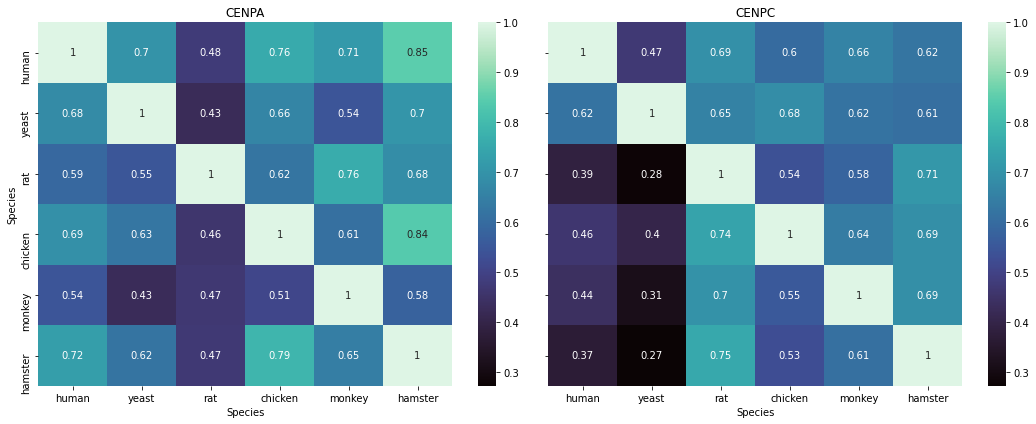

In [11]:
# To visualize our pairwise sequence alignemnts, we will use heat maps

# Create a list contained all the common names of the species we chose in the same order as our sequence files
species = ['human', 'yeast', 'rat', 'chicken', 'monkey', 'hamster']

# Create subplots to put both heat maps in the same figure
fig, axs = plt.subplots(ncols=2, sharey = True, figsize=(15, 6), gridspec_kw=dict(width_ratios=[1,1]))
# sharey = True means the two graphs share the same y-axis, in our case it is just the species names
# You can also use sharex = True, since the matrix x and y axis are the same

# define maximum and minimum of the graph, this allows us to show both heat maps using the same color gradient 
vmin = min(normalized_A.min(), normalized_C.min()) 
vmax = max(normalized_A.max(), normalized_C.max())

# Plot the heat maps using the normalized data. Use ax to assign each map to one of the subplots
# annot just shows the numeric value on top of the color blocks
# cmap is an argument for the color scheme used, 
# and robust is seaborn's algorithm to make the color contrast look nice
A = sns.heatmap(normalized_A, annot=True, ax=axs[0], vmax=vmax, vmin=vmin, cmap="mako", robust = True)
C = sns.heatmap(normalized_C, annot=True, ax=axs[1], vmax=vmax, vmin=vmin, cmap="mako", robust = True)

# set titles and labels for the figure
# title each subplot by the protein name
axs[0].set_title('CENPA') 
axs[1].set_title('CENPC')

# label the y-axis
axs[0].set_ylabel('Species')

# Change the tick labels into the species names
axs[0].set_yticklabels(species)

# label the x-axis
axs[0].set_xlabel('Species')
axs[1].set_xlabel('Species')

# Change the tick labels into species names
axs[0].set_xticklabels(species)
axs[1].set_xticklabels(species)

# show the entire layout in the 'tight' format, which means leaving no space between elements of the layout
fig.tight_layout()

### Part 2: Interactive MSA viewer for multiple protein sequence alignment

In [12]:
# Helper Function
# To better view the MSAs, we can make a widget that color codes each amino acid 
# and allows us to scroll through the sequence

# To construct the widget, I referenced the code from Damien Farrell, 
# see references (section 6) for more information on code soures.

# First, we need a specialized function to assign colors to each animo acid
def get_colors(seqs):
    """make colors for amino acides in the sequence"""
    text = [i for s in list(seqs) for i in s] # create a list of 'i' by iterating over each seq objects
    # this i will correspond to the letters that represent each amino acid in the seq records
    # I took this set of colors from gecos: https://gecos.biotite-python.org/intro.html
    # See references for more information
    clrs =  { 
        "A": "#7c7b8b",
        "C": "#17ebd9",
        "D": "#740365",
        "E": "#992651",
        "F": "#f3df8c",
        "G": "#140a1a",
        "H": "#b41308",
        "I": "#e8eafe",
        "K": "#fe83aa",
        "L": "#f0eee6",
        "M": "#fcdbce",
        "N": "#d0388b",
        "P": "#ba82fd",
        "Q": "#873429",
        "R": "#fe7878",
        "S": "#744759",
        "T": "#4c5e53",
        "V": "#afcbe0",
        "W": "#d5e70b",
        "Y": "#aa7e00",
        '-':'white'} # note that gap is also assigned to a color
    colors = [clrs[i] for i in text] 
    # create another list that use the dictionary clrs, 
    # this list should correspond to the key of 'i's
    return colors # The function returns the list of colors that correspond to a given sequence

In [13]:
# The following function creates a MSA viewing widget:

def view_alignment(aln, fontsize="9pt", plot_width=800):
    """Bokeh sequence alignment view"""

    #make sequence and id lists from the alignment object
    seqs = [rec.seq for rec in (aln)] # getting the sequences
    ids = [rec.id for rec in aln] # getting the ids   
    text = [i for s in list(seqs) for i in s] # reading the sequence one by one into a list
    colors = get_colors(seqs)  # using the helper function we just defined to assign colors to the seqs
    N = len(seqs[0]) # create a variable to construct an array with the proper sequence length
    S = len(seqs)    # create a second variable indicating the proper number of sequences
    width = .4

    x = np.arange(1,N+1) # create evenly spaced values between 1 and N+1
    y = np.arange(0,S,1) # create evenly spaced values between 0 and S, with a step/spacing of 1 inbetween values
    # this pretty much construct the x and y axis of our widget
    # y axis will be the length of the sequence
    # while x axis will be a list of the different sequences
    
    # creates a 2D grid of coords from the 1D arrays
    xx, yy = np.meshgrid(x, y) # With the evenly spaced values we created, make a grid where we can put the colors
    
    # flattens the arrays
    gx = xx.ravel() # returns a flattened array (1D)
    gy = yy.flatten() # returns a copy of the flattened array (1D)
    
    # use recty for rect coords with an offset
    recty = gy+.5 # make rectangles along the mesh we created, these will be the blocks for our amino acids
    h= 1/S
    
    # now we can create the ColumnDataSource with all the arrays
    source = ColumnDataSource(dict(x=gx, y=gy, recty=recty, text=text, colors=colors)) 
    # ColumnDataSource is just the data structure that Bokeh uses
    plot_height = len(seqs)*15+50
    x_range = Range1d(0,N+1, bounds='auto') # adjust the plot hight and length to the seqs fed into the function
    if N>100:
        viewlen=100
    else:
        viewlen=N # to avoid squashing of our plot, we limit the view window to 100 amino acids
        
    # view_range is for the close up view
    view_range = (0,viewlen)
    tools="xpan, xwheel_zoom, reset, save" # these will show up as buttons on the bottom of the widget
    # isn't bokeh wonderful?!

    # entire sequence view (no text, with zoom)
    p = figure(title=None, plot_width= plot_width, plot_height=50,
               x_range=x_range, y_range=(0,S), tools=tools,
               min_border=0, toolbar_location='below') # construct the figure and put all the elements in place
    rects = Rect(x="x", y="recty",  width=1, height=1, fill_color="colors",
                 line_color=None, fill_alpha=0.6) # fill the rectangles we created with the correct colors
    p.add_glyph(source, rects) # add the blocks to the widget
    p.yaxis.visible = False # get rid of the automatic y-axis because we just want a tidy overview
    p.grid.visible = False # Turn off the grid, showing only the colored rectangles

    # sequence text view with the ability to scroll along x axis
    # same as the entire sequence view, just larger and with the sequence text and scrollable
    p1 = figure(title=None, plot_width=plot_width, plot_height=plot_height,
                x_range=view_range, y_range=ids, tools="xpan,reset",
                min_border=0, toolbar_location='below')         
    glyph = Text(x="x", y="y", text="text", text_align='center',text_color="black",
                text_font="monospace",text_font_size=fontsize)
    rects = Rect(x="x", y="recty",  width=1, height=1, fill_color="colors",
                line_color=None, fill_alpha=0.4)
    p1.add_glyph(source, glyph)
    p1.add_glyph(source, rects)

    p1.grid.visible = False
    p1.xaxis.major_label_text_font_style = "bold"
    p1.yaxis.minor_tick_line_width = 0
    p1.yaxis.major_tick_line_width = 0

    p = gridplot([[p],[p1]], toolbar_location='below')
    return p

In [14]:
# The moment of truth! Time to show our MSA viewer!
aln_A = AlignIO.read('CENPA_aligned.fasta','fasta') # use AlignIO to read the MSA
CENPA_v = view_alignment(aln_A, plot_width=900) # feed our function with the read alignement
pn.pane.Bokeh(CENPA_v) # show the widget

Bokeh(Column)

In [15]:
# we will do the same thing with CENP-C, you can see that it's much longer and the scrolling helps a lot!
aln_C = AlignIO.read('CENPC_aligned.fasta','fasta')
CENPC_v = view_alignment(aln_C, plot_width=900)
pn.pane.Bokeh(CENPC_v)

Bokeh(Column)

### Part 3: Dendrogram/Phylogenetic trees for CENP-A and CENP-C

<div class="alert alert-block alert-warning">
<b>Note:</b> MUSCLE generates tree.newick files that contains semicolons(;) to separate the alternative names of a single seq record, but phylo doesn't recognize that and gives an error. Therefore, before running, it will be the best to get rid of all the semicolons and alternative names, leaving only the id number followed by the calculated distance.<br> 
<b>Be careful!</b> don't delete the one semicolon at the very end, for it is needed for phylo to recodnize the file.
</div>

<div class="alert alert-block alert-success">
<b>Examples:</b> I've included in the repository 4 newick tree files, 2 labeled with _MUSCLE_original came from the alignment we did earlier, and 2 without the label were modified and used to draw the following trees. Check them out to figure out how to fix the file.
</div>

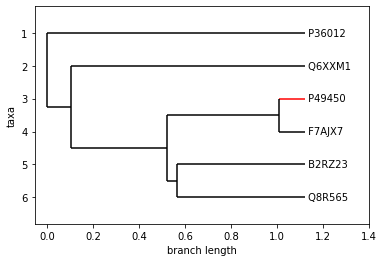

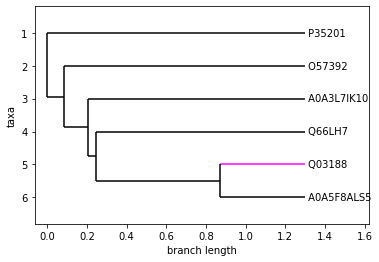

In [16]:
#Read the tree file we saved earlier from the MUSCLE alignment
treeA = Phylo.read("CENPA_tree.newick", "newick")

treeA.ladderize()  # Flip branches so deeper clades are displayed at top
#treeA.clade[1, 1, 0].color = "red"
mrca_a = treeA.common_ancestor({"name": hs_a}) 
# color the clade of human CENPA, 
# here we use the .common_ancestor method, 
# but since we don't know the most recent common anscestor for human CENPA yet, we only input one sequence id (hs_a),
# and phylo will just find the human clade.
mrca_a.color = "red" # color the human clade red
Phylo.draw(treeA) # draw out the tree

# Do the same with the CENP-C tree, and color the human clade magenta
treeC = Phylo.read("CENPC_tree.newick", "newick")
treeC.ladderize() 
mrca_c = treeC.common_ancestor({"name": hs_c}) 
mrca_c.color = "magenta"
Phylo.draw(treeC)

## Analysis of the results

The heat maps shown in 4.Part1 gives the pairwise protein sequence alignment score for all 6 sequences of both CENP-A and CENP-C. The darker the color, the lower the alignment score. Since the CENP-A map has generally lighter colors than the CENP-C map and contains the highest normalized alignemnt score, 0.85, it is reasonable to conclude that the chosen CENP-A orthologs are more similar to each other sequence-wise than the CENP-C orthologs. This conclusion is consistent with the hypothesis of the study, and is also illustrated by the MSA viewer in 4.Part2. 
<br> <br>
At first glance, it might appear that the color blocks covers more area in the CENP-C MSA viewer than the one for CENP-A. However, upon close examination, it is clear that the color blocks for CENP-A shows a vertically-striped pattern, indicating conserved residues and motifs among most of the species, while the color blocks for CENP-C is less uniform, with the vertical stripes breaking in between species, indicating a lack of conservation or alternative use of animo acids. 
<br> <br>
It is worth noting that CENP-C is a much larger protein than CENP-A, which could have contributed to the higher variabilities. Moreover, it is also important to understand that not all residues in the protein are essential or functional. The MSA not only gives us a general sense of the protein conservation but also indicates to us the potentially funcionally important residues which are often the most conserved (evolution doesn't lie!). Therefore, a future study could look at highly conserved residues for CENP-C with a local MSA and identify interesting motifs that could be experimentally explored in model organisms that are point mutants and/or deletion mutants of these motifs.
<br> <br>
Lastly, based on the dendrogram in 4.Part3, the closest ortholog to human CENP-A and CENP-C are the sequences with ids of F7AJX7 and A0A5F8ALS5, respectively. Both of the sequences came from monkey, indicating that monkey has the highest protein sequence homology to human CENP-A and CENP-C. This is not surprizing because monkey is the only primate among the chosen model organisms, and we know that it is closely related to us. However, if we look at the pairwise sequence alignment scores, yeast, chicken, and Chinese hampster CENP-As are surprisingly similar to human CENP-A, some of their alignment scores are even higher than moneky. In parallel, the CENP-C pairwise alignment scores, despite being generally lower, are very similar among all model organisms. Therefore, it appears that all model organisms besides rat are good candidate model organism for studying the function of CENP-A, while CENP-C might be better studied in human cells directly (Keep in mind that this does not devalue the results of CENP-C studies that uses a model organism). 

## References

1) Cheeseman, I. (2014). The Kinetochore. Cold Spring Harbor Perspectives In Biology, 6(7), a015826-a015826. https://doi.org/10.1101/cshperspect.a015826
<br><br>
2) Cock, P.J.A. et al. (2009) Biopython: freely available Python tools for computational molecular biology and bioinformatics. Bioinformatics; 25(11) 1422-3 https://doi.org/10.1093/bioinformatics/btp163 pmid:19304878
<br><br>
3) Ebrahim, M. (2021). Seaborn heatmap tutorial (Python Data Visualization) - Like Geeks. Like Geeks. Retrieved 8 June 2021, from https://likegeeks.com/seaborn-heatmap-tutorial/.
<br><br>
4) Edgar, R. (2004). MUSCLE: multiple sequence alignment with high accuracy and high throughput. Nucleic Acids Research, 32(5), 1792-1797. https://doi.org/10.1093/nar/gkh340
<br><br>
5) Farrell, D. (2019). Bioinformatics and other bits - A sequence alignment viewer with Bokeh and Panel. Dmnfarrell.github.io. Retrieved 8 June 2021, from https://dmnfarrell.github.io/bioinformatics/bokeh-sequence-aligner.
<br><br>
6) Hinshaw, S., & Harrison, S. (2019). The structure of the Ctf19c/CCAN from budding yeast. Elife, 8(e44239). https://doi.org/10.7554/elife.44239
<br><br>
7) Hooff, J., Tromer, E., Wijk, L., Snel, B., & Kops, G. (2017). Evolutionary dynamics of the kinetochore network in eukaryotes as revealed by comparative genomics. EMBO Reports, 18(9), 1559-1571. https://doi.org/10.15252/embr.201744102
<br><br>
8) Hunter, J. (2007). Matplotlib: A 2D Graphics Environment. Computing In Science & Engineering, 9(3), 90-95. https://doi.org/10.1109/mcse.2007.55
<br><br>
9) Kunzmann, P. (2019). Getting started — gecos documentation. Gecos.biotite-python.org. Retrieved 8 June 2021, from https://gecos.biotite-python.org/intro.html.
<br><br>
10)  Waskom, M. (2021). seaborn: statistical data visualization. Journal Of Open Source Software, 6(60), 3021. https://doi.org/10.21105/joss.03021
<br><br>
11) Xiao, H., Wang, F., Wisniewski, J., Shaytan, A., Ghirlando, R., & FitzGerald, P. et al. (2017). Molecular basis of CENP-C association with the CENP-A nucleosome at yeast centromeres. Genes & Development, 31(19), 1958-1972. https://doi.org/10.1101/gad.304782.117
